# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 3</a>


## Inference with Pre-trained ResNet Model

In this notebook, we use pre-trained [ResNet](https://d2l.ai/chapter_convolutional-modern/resnet.html) with only a few lines of code.

1. <a href="#1">Downloading a Pretrained Model</a>      
2. <a href="#2">Preprocessing an Image</a>
3. <a href="#3">Using ResNet50 for Inference</a>
    

First of all, we install torch and torchvision using `pip install`.

In [1]:
! pip install -q nvidia-ml-py3==7.352.0
! pip install -q torch==1.8.0
! pip install -q torchvision==0.9.0
! pip install -q d2l==0.16.0
! pip install -q numpy==1.19.5

Let's import the necessary libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import torch
import torchvision
from torchvision import transforms
from torchvision.models import resnet50

## 1. <a name="1">Downloading a Pretrained Model</a>
(<a href="#0">Go to top</a>)

With torchvision, we will start with a ResNet 50 neural net trained on ImageNet dataset as our base model. By specifying
`pretrained=True`, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to [torchvision Model Zoo](https://pytorch.org/vision/stable/models.html).

In [3]:
net = resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

## 2. <a name="2">Pre-processing an Image</a>
(<a href="#0">Go to top</a>)

Next we read a sample image, and pre-process it with preset data transforms `transform_eval`.

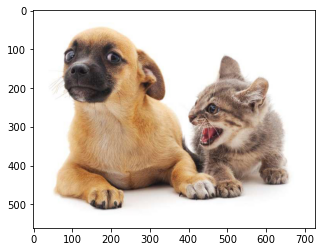

In [4]:
img_raw = Image.open('../../data/catdog.jpg').convert('RGB')
plt.imshow(img_raw)
plt.show()

transform_eval = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

img = transform_eval(img_raw)

## 3. <a name="3">Inference Using ResNet50</a>
(<a href="#0">Go to top</a>)

Now let's generate the predictions from the pretrained ResNet50.
`pred` will be a list of ndarray, where each ndarray is of length 1000.
Each number of this 1000-length ndarray can be applied `softmax` to 
represent the prediction confidence towards each of the [subject classes in ImageNet](https://image-net.org/challenges/LSVRC/index.php).

In [5]:
net.eval()
pred = net(img.unsqueeze(0))
len(pred[0])

1000

To access all the existing classes of ImageNet, pytorch doesn't offer an in-built function. So we use json to load an external list which has a mapping for the ImageNet classes to the indices. Let's take a look of the first 5 classes!

In [6]:
import json

with open("../../data/imagenet_idx_to_class.json", "r") as f:
    classes = json.load(f)
    
classes[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

Now let's see how does the model think of our input test image?!

In [7]:
topK = 5
conf, ind = torch.topk(pred.squeeze(0), k=topK)
ind = ind.squeeze(0).numpy()
print('The input picture is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i]], torch.softmax(pred.squeeze(0), dim=0)[ind[i]].item()))

The input picture is classified to be
	[Chihuahua], with probability 0.283.
	[Brabancon griffon], with probability 0.044.
	[German shepherd], with probability 0.031.
	[tennis ball], with probability 0.028.
	[Norfolk terrier], with probability 0.026.


Feel free to download and try other ResNet versions (ResNet18, ResNet101, ResNet152, etc.) in your own experiment. What is more, try to fineture on other datasets to see if you can improve the model performance.